In [1]:
import numpy as np
import random
import math

# can change these conditions
learning_rate=0.01
k=3
N=75      # number of datapoints: 75


x=np.random.uniform(0, 1, size=75).reshape(75,1)  # make 75 random x values
x=np.sort(x, axis=0)
noise=np.random.uniform(-0.1,0.1,size=75).reshape(75,1) # make noise
h=0.5+0.4*np.sin(3*np.pi*x)  # h(x)

d=np.array(h).reshape(N,1)  # desired(true) output
h=np.add(h,noise) # add noise to h(x) function


In [2]:

def Kmeans(x, k):
    index=[i for i in range(N)]
    randidx=random.sample(index, k)  # randomly select k indices for initial centers    
    cent=[]
    for i in randidx:
        cent.append(x[i]) # randomly select k initial centers among x
    converge=False

    while not converge:
   
      cj=[]
      for j in range(k):
        cj.append([])  # make k clusters

      for datapoint in x:  # datapoint
          dis=[]
          for c in cent:
              distance=np.abs(datapoint-c)
              dis.append(distance)

          clus=dis.index(min(dis))  # find the closest cluster
          cj[clus].append(datapoint)
      
      #update cluster center
      newcent=[]
      for i in cj:        # new Centroid of this cluster is average of containing datapoints
        centx=[]
        for j in i:
          centx.append(j[0])
        newcent.append(np.mean(centx))      
      count=0
      for i in range(len(cent)):
        difcenter=np.abs(cent[i] - newcent[i])        
        if difcenter < 0.0001:
            count+=1
        if count==k:
          center=newcent    # cj is datapoints in each cluster  # newcent is the result of Kmeans: centroids
          converge=True
      cent=newcent
    
    # Get variance of each cluster
    var=[]   # Variance = sigma^2
    for j in range(k):   # for each clusters
        n=len(cj[j])  # number of datapoints in this cluster
        if n==1:     # if only one datapoint is in this cluster
            var.append(1) # 1 will be replaced as average of other varicances
        else:
            dis = 0
            for i in cj[j]:   # each data points in this particular cluster
                dis+= np.abs(i- cent[j])**2     # get sum(|| uj - xi ||^2)
                                                 # Eucldis has sqrt value. So square each
            vari=(dis/n)
            var.append(vari[0])
    # to get variance of cluster which has only one data point or does not have datapoint
    count=0
    sum=0
    for i in var:
        if i!= 1:
            sum+=i
            count+=1
    othervars=sum/count
    for i in range(len(var)):
        if var[i]==1 or var[i]==0:
            var[i]=othervars

    return center, var


# From Kmeans and Vari, I can get Gaussian Centers(centroids) and Widths(variances)
Kmeans(x,k)




([0.8170626162836874, 0.509644638955589, 0.179528762248669],
 [0.010846573242334357, 0.0059395461811271675, 0.010850535831079972])

In [3]:
def rbf(x, cent, var):  # input is one datapoint, k centers, k variances
    f=-1/(2*var)
    b=(x-cent)**2    
    return np.exp(f*b)

centers, vars= Kmeans(x,k)

def update(x,k):  
  epochs=100
    
  weights=np.random.randn(k).reshape(1,k)
  bias = np.random.randn(1)

  print(weights)

  for epoch in range(epochs):
    for dp in range(len(x)):
      aa=np.zeros(k).reshape(k,1)
      for j in range(len(centers)):    
        a=rbf(x[dp], centers[j], vars[j])
        aa[j]=a   
      F=np.dot(weights,aa)+bias
      
      loss=0.5*(h[dp]-F)**2  
      error=-(h[dp] - F) 

      weights=weights - learning_rate*error*aa.T
      bias=bias -learning_rate*error

  final_weights=weights
  final_bias=bias
  return final_weights, final_bias

final_weights, final_bias=update(x,k)
print(final_weights)
print(final_bias)

[[ 1.10242434  0.80614278 -2.07756897]]
[[-0.32264425  0.49231111  0.44056864]]
[[0.41387098]]


In [4]:
def predict(x, final_weights, final_bias):
  y_pred=[]
  for dp in range(len(x)):
    aa=np.zeros(k).reshape(k,1) 
    for j in range(k): 
      a=rbf(x[dp], centers[j], vars[j]) 
      aa[j]=a   
    F=np.dot(final_weights,aa)+final_bias
    y_pred.append(F[0])

  return y_pred


In [5]:
final_weights, final_bias=update(x,k)

y=predict(x, final_weights, final_bias)



[[-0.88519633  0.76338417 -0.46566129]]


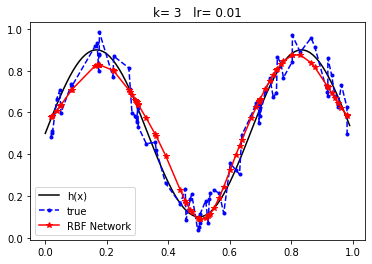

In [6]:
import matplotlib.pyplot as plt

xr=np.arange(0,1, 0.01)
yr=0.5+0.4*np.sin(3*np.pi*xr)

plt.title('k= %d   lr= %0.2f' %(k,learning_rate))
plt.plot(xr,yr, '-', color='black', label='h(x)')  # Blud curve is true function plot
plt.plot(x,h, '--.', color='blue', label='true')  # red curve has noise: Our original datapoint
plt.plot(x,y, '-*', color='red', label='RBF Network')  # red curve has noise 
plt.legend()

[0.06774157 0.06774157 0.06774157]
[[-0.63965551 -0.15100324  0.41775737]]
[[-0.71907568  0.53753631  0.46724883]]
[[0.52460664]]


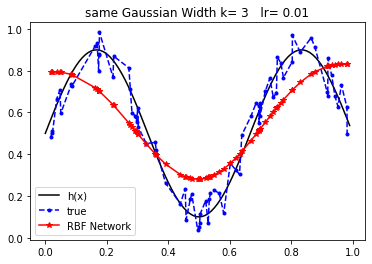

In [7]:
# use this for same standard variation

dMax=max([np.abs(c1-c2) for c1 in centers for c2 in centers] )
samevars=np.repeat((dMax**2)/(2*k), k)  # I just got variance instead of standard variation
                                        # because my codes are depend on variances
print(samevars)

def svupdate(x,k):  
  epochs=100
    
  weights=np.random.randn(k).reshape(1,k)
  bias = np.random.randn(1)

  print(weights)

  for epoch in range(epochs):
    for dp in range(len(x)):
      aa=np.zeros(k).reshape(k,1)
      for j in range(len(centers)):    
        a=rbf(x[dp], centers[j], samevars[j])
        aa[j]=a   
      F=np.dot(weights,aa)+bias
      
      loss=0.5*(h[dp]-F)**2  
      error=-(h[dp] - F) 

      weights=weights - learning_rate*error*aa.T
      bias=bias -learning_rate*error

  final_weights=weights
  final_bias=bias
  return final_weights, final_bias

sv_final_weights, sv_final_bias=svupdate(x,k)
print(sv_final_weights)
print(sv_final_bias)


def svpredict(x, final_weights, final_bias):
  y_pred=[]
  for dp in range(len(x)):
    aa=np.zeros(k).reshape(k,1) 
    for j in range(k): 
      a=rbf(x[dp], centers[j], samevars[j]) 
      aa[j]=a   
    F=np.dot(final_weights,aa)+final_bias
    y_pred.append(F[0])

  return y_pred

svy=svpredict(x, sv_final_weights, sv_final_bias)



xr=np.arange(0,1, 0.01)
yr=0.5+0.4*np.sin(3*np.pi*xr)

plt.title('same Gaussian Width k= %d   lr= %0.2f' %(k,learning_rate))
plt.plot(xr,yr, '-', color='black', label='h(x)')  # Blud curve is true function plot
plt.plot(x,h, '--.', color='blue', label='true')  # red curve has noise: Our original datapoint
plt.plot(x,svy, '-*', color='red', label='RBF Network')  # red curve has noise 
plt.legend()

In [8]:
# Get Accuracy of using Gaussian Width
avgerror=np.mean(np.abs(y-h))
accuracy=1-avgerror

# Accuracy of Same Variation case
svavgerror=np.mean(np.abs(svy-h))
svaccuracy=1-svavgerror

print(accuracy)
print(svaccuracy)

0.9359798537061974
0.8627080664643432
